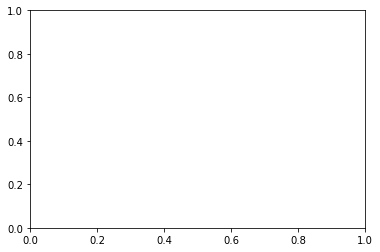

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np


warnings.filterwarnings('ignore')
%matplotlib inline
plt.cla()

In [2]:
# data_pi = pd.read_csv('/home/ss26/Projects/Smart-Tools/data/pi_cutting_compare.csv').rename(columns={'Unnamed: 0':'Index'}).drop(columns=['0']).dropna().reset_index(drop=True)
# data_ar = pd.read_csv('/home/ss26/Projects/Smart-Tools/data/A_cutting_compare.csv').rename(columns={'Unnamed: 0':'Index'}).dropna().reset_index(drop=True)
# data2 = pd.read_csv('/home/ss26/Projects/Smart-Tools/data/engraving1.csv')
# data = pd.concat([data, data2], axis=0, ignore_index=True)
# data = data
# data = data
data = pd.read_csv('/home/ss26/Projects/Smart-Tools/data/test-sanity.csv')
data

,Unnamed: 0,0,timestamp,roll,pitch,yaw,accX,accY,accZ,wx,wy,wz,bx,by,bz,Isens,Srms,Activity
0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1209,NaN,19.935268,-72.3125,-77.8125,354.5000,-9.25,2.74,0.76,0.007778,-0.018889,0.046667,26.5625,8.00,-0.0625,128.0,9088.0,1.0
1209,1210,NaN,19.950319,-72.1875,-77.8125,354.3750,-9.31,2.83,0.75,-0.017778,-0.006667,0.106667,26.5625,8.00,-0.0625,128.0,8000.0,1.0
1210,1211,NaN,19.966894,-72.1250,-77.8125,354.3125,-9.24,2.82,0.78,-0.066667,-0.012222,0.154444,26.5625,8.00,-0.0625,128.0,8960.0,1.0
1211,1212,NaN,19.979968,-72.0000,-77.7500,353.3125,-9.23,2.64,0.77,-0.084444,-0.017778,0.136667,28.0625,8.25,-0.0625,128.0,8128.0,1.0


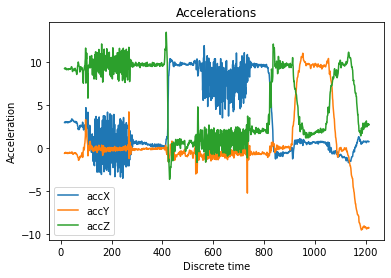

In [ ]:
fig = plt.figure()
plt.plot(data.index, data['accZ'])
plt.plot(data.index, data['accX'])
plt.plot(data.index, data['accY'])
plt.ylabel("Acceleration")
plt.xlabel("Discrete time")
plt.title("Accelerations")
plt.legend(['accX', 'accY', 'accZ'])
plt.show()

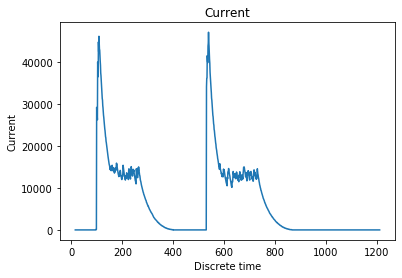

In [ ]:
fig = plt.figure()
plt.plot(data.index, data['Isens'])
plt.ylabel("Current")
plt.xlabel("Discrete time")
plt.title("Current")
# plt.legend(['accX', 'accY', 'accZ'])
plt.show()

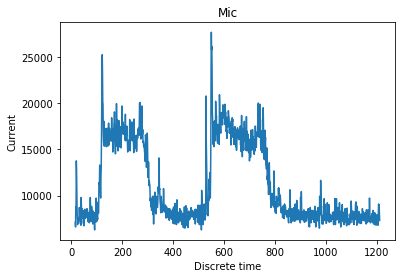

In [6]:
fig = plt.figure()
plt.plot(data.index, data['Srms'])
plt.ylabel("Current")
plt.xlabel("Discrete time")
plt.title("Mic")
# plt.legend(['accX', 'accY', 'accZ'])
plt.show()

In [110]:
# cleaning data
window_seconds_ar = 0.25
timestep_ar = 1/104
window_size_ar = int(window_seconds_ar * 1/timestep_ar)
data_ar_avg = data_ar.rolling(window_size_ar).mean().dropna().reset_index(drop=True)
data_ar_avg

,Time,accX,accY,accZ,wx,wy,wz,bx,by,bz,Fsens,BH_10_Isens,BH_05_Isens,ACS_Isens,Srms
0,0.120702,-0.705989,0.918495,-0.394606,2.824050,3.694974,4.129263,30.786133,-11.193378,19.165039,32.000000,90.000000,30.153846,57.615385,49802.116286
1,0.130337,-0.702702,0.912147,-0.408311,4.037710,3.840520,4.591722,30.780029,-11.209811,19.144851,31.423077,90.000000,30.230769,56.461538,49791.311599
2,0.139952,-0.708003,0.905611,-0.410396,4.014235,3.821740,5.133996,30.773926,-11.226243,19.124662,29.346154,90.115385,29.076923,55.423077,49784.991436
3,0.149568,-0.712473,0.899785,-0.416851,4.051795,3.995455,5.666880,30.767822,-11.242676,19.104473,27.653846,90.000000,27.923077,54.730769,49824.408654
4,0.159182,-0.716309,0.888522,-0.432847,5.382831,4.549467,5.957970,30.761719,-11.259108,19.084285,26.461538,89.538462,27.615385,54.269231,49860.141226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15570,152.415294,-0.310979,0.707313,-0.153672,0.913180,2.319336,0.056340,46.339299,-28.839581,26.129150,52.538462,141.730769,41.884615,59.615385,24934.710562
15571,152.419522,-0.310979,0.707313,-0.153672,0.718337,2.009465,0.049298,46.867488,-29.224572,26.108023,52.615385,143.076923,41.961538,60.576923,25305.646935
15572,152.423714,-0.323078,0.739662,-0.139320,0.467154,2.014160,0.082163,47.395677,-29.609563,26.086895,52.653846,143.615385,42.230769,59.730769,25676.583308
15573,152.427942,-0.323078,0.739662,-0.139320,0.467154,2.014160,0.082163,47.923866,-29.994554,26.065768,51.000000,144.076923,42.269231,58.807692,26047.519681


In [111]:
# cleaning data
window_seconds_pi = 0.25
timestep_pi = 1/76
window_size_pi = int(window_seconds_pi * 1/timestep_pi)
data_pi_avg = data_pi.rolling(window_size_pi).mean().dropna().reset_index(drop=True)
data_pi_avg

,Index,timestamp,roll,pitch,yaw,accX,accY,accZ,wx,wy,wz,bx,by,bz,Isens,Srms,Activity
0,25.0,0.194227,-10.546053,112.230263,16.134868,3.005789,-6.036316,3.394737,0.123275,0.118070,0.070526,-18.263158,30.401316,22.207237,3843.368421,545.684211,1.0
1,26.0,0.212342,-10.664474,112.167763,15.822368,3.165789,-5.999474,3.279474,0.131579,0.092632,0.075263,-18.174342,30.453947,22.203947,2721.684211,522.105263,1.0
2,27.0,0.230071,-10.782895,112.088816,15.539474,3.087895,-6.057895,3.662632,0.091287,0.003684,0.071287,-18.148026,30.447368,22.226974,2428.631579,599.578947,1.0
3,28.0,0.247326,-10.884868,112.029605,15.286184,3.167368,-6.062105,3.422632,0.087310,0.057719,0.061520,-18.101974,30.460526,22.187500,1664.000000,549.052632,1.0
4,29.0,0.264064,-11.006579,111.976974,14.950658,3.100526,-6.036842,3.405789,0.093041,0.113684,0.065029,-18.055921,30.523026,22.088816,1475.368421,565.894737,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,8964.0,149.788702,22.976974,-178.828947,199.937500,-0.280526,-7.771053,-1.528421,-0.007661,0.073216,-0.048480,-33.000000,16.799342,13.625000,926.315789,538.947368,1.0
8940,8965.0,149.805344,23.016447,-178.796053,199.894737,-0.021579,-7.493158,-1.394737,-0.009708,0.071170,-0.052164,-33.036184,16.812500,13.644737,949.894737,532.210526,1.0
8941,8966.0,149.822120,23.062500,-178.766447,199.848684,-0.061579,-7.533684,-1.272632,-0.015614,0.041170,-0.055322,-33.072368,16.825658,13.664474,973.473684,538.947368,1.0
8942,8967.0,149.838692,23.121711,-178.736842,199.796053,-0.139474,-7.470526,-1.382105,-0.001287,0.098187,-0.059064,-33.125000,16.881579,13.717105,933.052632,518.736842,1.0


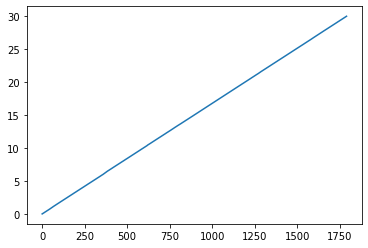

In [15]:
# plt.plot(data_pi.index, data_pi['timestamp'])
# plt.show()

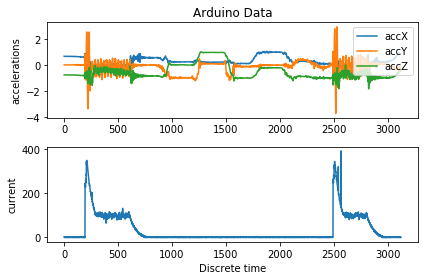

In [34]:
fig_pi, (accs_ar, curr_ar) = plt.subplots(2)
accs_ar.plot(data_ar.index, data_ar['accX'])
accs_ar.plot(data_ar.index, data_ar['accY'])
accs_ar.plot(data_ar.index, data_ar['accZ'])

accs_ar.legend(['accX', 'accY', 'accZ'], loc='upper right')

curr_ar.plot(data_ar.index, data_ar['BH_10_Isens'])

accs_ar.set_ylabel("accelerations")
curr_ar.set_ylabel("current")
# accZ_ar.set_ylabel("accZ")

curr_ar.set_xlabel("Discrete time")
accs_ar.set_title("Arduino Data")
plt.tight_layout()

plt.show()

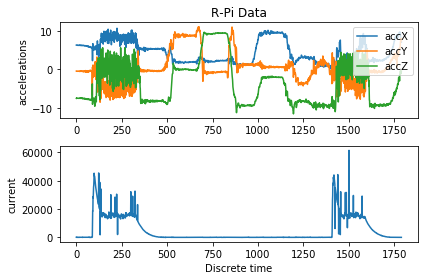

In [37]:
fig_pi, (accs_pi, curr_pi) = plt.subplots(2)
accs_pi.plot(data_pi.index, data_pi['accX'])
accs_pi.plot(data_pi.index, data_pi['accY'])
accs_pi.plot(data_pi.index, data_pi['accZ'])

accs_pi.legend(['accX', 'accY', 'accZ'], loc='upper right')

curr_pi.plot(data_pi.index, data_pi['Isens'])

accs_pi.set_ylabel("accelerations")
curr_pi.set_ylabel("current")
# accZ_ar.set_ylabel("accZ")

curr_pi.set_xlabel("Discrete time")
accs_pi.set_title("R-Pi Data")
plt.tight_layout()

plt.show()

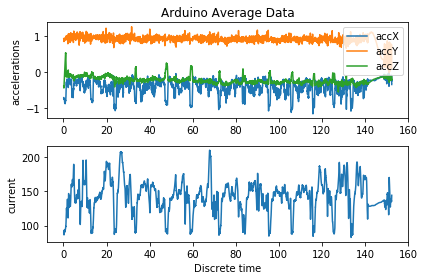

In [112]:
fig_ar_avg, (accs_ar, curr_ar) = plt.subplots(2)
accs_ar.plot(data_ar_avg['Time'], data_ar_avg['accX'])
accs_ar.plot(data_ar_avg['Time'], data_ar_avg['accY'])
accs_ar.plot(data_ar_avg['Time'], data_ar_avg['accZ'])

accs_ar.legend(['accX', 'accY', 'accZ'], loc='upper right')

curr_ar.plot(data_ar_avg['Time'], data_ar_avg['BH_10_Isens'])

accs_ar.set_ylabel("accelerations")
curr_ar.set_ylabel("current")
# accZ_ar.set_ylabel("accZ")

curr_ar.set_xlabel("Discrete time")
accs_ar.set_title("Arduino Average Data")
plt.tight_layout()

plt.show()


In [113]:
fig_ar_avg.savefig('/home/ss26/Projects/Smart-Tools/progress/mar1/ar_avg_cut.png', dpi=600)

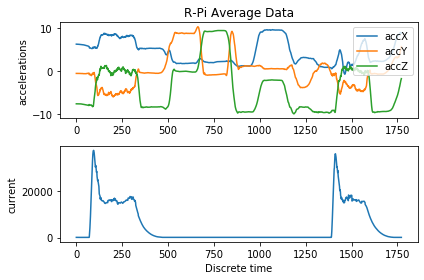

In [47]:
fig_pi, (accs_pi, curr_pi) = plt.subplots(2)
accs_pi.plot(data_pi_avg.index, data_pi_avg['accX'])
accs_pi.plot(data_pi_avg.index, data_pi_avg['accY'])
accs_pi.plot(data_pi_avg.index, data_pi_avg['accZ'])

accs_pi.legend(['accX', 'accY', 'accZ'], loc='upper right')

curr_pi.plot(data_pi_avg.index, data_pi_avg['Isens'])

accs_pi.set_ylabel("accelerations")
curr_pi.set_ylabel("current")
# accZ_ar.set_ylabel("accZ")

curr_pi.set_xlabel("Discrete time")
accs_pi.set_title("R-Pi Average Data")
plt.tight_layout()

plt.show()

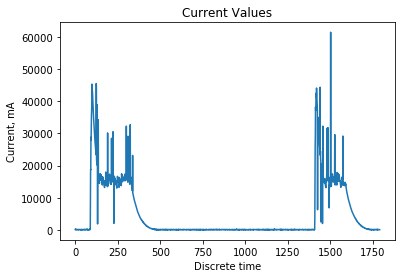

In [28]:
# plt.cla()
current = plt.figure()
plt.plot(data_pi.index, data_pi['Isens'])
plt.ylabel("Current, mA")
plt.xlabel("Discrete time")
plt.title("Current Values")
# plt.legend(['accX', 'accY', 'accZ'])
plt.show()

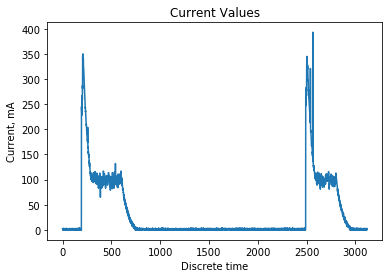

In [31]:
current = plt.figure()
plt.plot(data_ar.index, data_ar['BH_10_Isens'])
plt.ylabel("Current, mA")
plt.xlabel("Discrete time")
plt.title("Current Values")
# plt.legend(['accX', 'accY', 'accZ'])
plt.show()

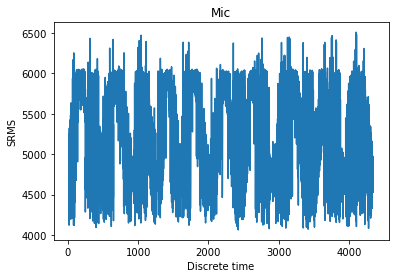

In [11]:
srms = plt.figure()
plt.plot(data.index, data['Srms'])

plt.ylabel("SRMS")
plt.xlabel("Discrete time")
plt.title("Mic")
plt.show()

In [114]:
# convert pi to arduino distribution
data_pi_conv = data_pi.copy()
data_pi_conv['accX'] /= 9.81
data_pi_conv['accY'] /= 9.81
data_pi_conv['accZ'] /= 9.81

data_pi_conv['accY'] *= -1

data_pi_conv['wx'] *= (180/np.pi)
data_pi_conv['wy'] *= (180/np.pi)
data_pi_conv['wz'] *= (180/np.pi)

data_pi_conv['wy'] *= -1

data_pi_conv['by'] *= -1

data_pi_conv['Isens'] /= 157.26

data_pi_conv = data_pi_conv.rolling(window_size_pi).mean().dropna().reset_index(drop=True)
# data_pi_conv.to_csv('/home/ss26/Projects/Smart-Tools/data/rpi_converted.csv')


In [69]:
data_pi_conv.iloc[140:330, -3].mean()

157.2609418282549

In [63]:
data_pi_conv['Isens']

0       1.077895
1       1.044211
2       1.044211
3       0.909474
4       0.909474
          ...   
1767    1.044211
1768    1.044211
1769    1.044211
1770    1.010526
1771    0.976842
Name: Isens, Length: 1772, dtype: float64

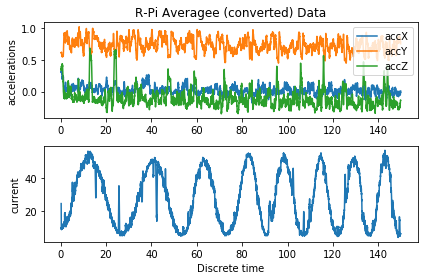

In [115]:
fig_pi_conv_avg, (accs_pi, curr_pi) = plt.subplots(2)
accs_pi.plot(data_pi_conv['timestamp'], data_pi_conv['accX'])
accs_pi.plot(data_pi_conv['timestamp'], data_pi_conv['accY'])
accs_pi.plot(data_pi_conv['timestamp'], data_pi_conv['accZ'])

accs_pi.legend(['accX', 'accY', 'accZ'], loc='upper right')

curr_pi.plot(data_pi_conv['timestamp'], data_pi_conv['Isens'])

accs_pi.set_ylabel("accelerations")
curr_pi.set_ylabel("current")
# accZ_ar.set_ylabel("accZ")

curr_pi.set_xlabel("Discrete time")
accs_pi.set_title("R-Pi Averagee (converted) Data")
plt.tight_layout()

plt.show()


In [116]:
fig_pi_conv_avg.savefig('/home/ss26/Projects/Smart-Tools/progress/mar1/pi_conv_avg_cut.png', dpi=600)